In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.tools.plotting import table
%matplotlib inline 
sns.set(style="darkgrid")
massa = pd.read_csv('legislativo', delimiter=";", encoding='UTF-8',header=0,index_col = 0)

In [2]:
plt.rcParams['figure.figsize'] = (14,8)

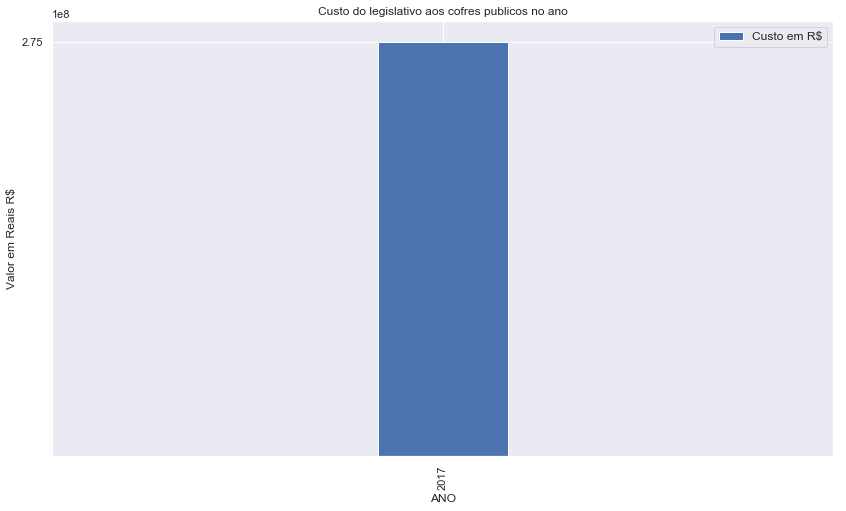

In [3]:
#Grafico 1
#Subprocesso 3-1-1
gasto_mega = massa.groupby(['ANO'], as_index=False)['VALOR'].sum()
#plotar
ax14 =gasto_mega.plot(kind='bar',x='ANO',y='VALOR',width=0.1,yticks=gasto_mega['VALOR'],style='deep')
ax14.legend()
ax14.set_ylabel("Valor em Reais R$")
ax14.legend(['Custo em R$'],fontsize=12)
ax14.set_title('Custo do legislativo aos cofres publicos no ano')
ax14.grid(True)


Text(0.5,1,'Comparação de gastos Senadores x Deputados')

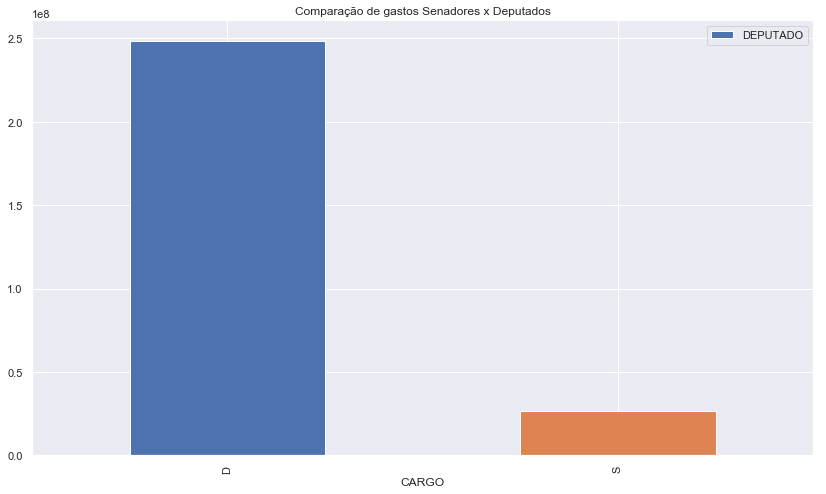

In [12]:
#Gráfico 2
# Comparativo de gastos Senadores x Deputados
#Subprocesso 3-1-2
#Dividir por cargo
gasto_mega_cargo = massa.groupby(['CARGO'],as_index=False).sum().sort_values('VALOR',ascending=False)

ax15 = gasto_mega_cargo.plot(kind='bar',x='CARGO',y='VALOR')
ax15.legend(["DEPUTADO","SENADOR"])
ax15.set_title('Comparação de gastos Senadores x Deputados')



Text(0.5,1,'Proporção de gastos Senadores x Deputados')

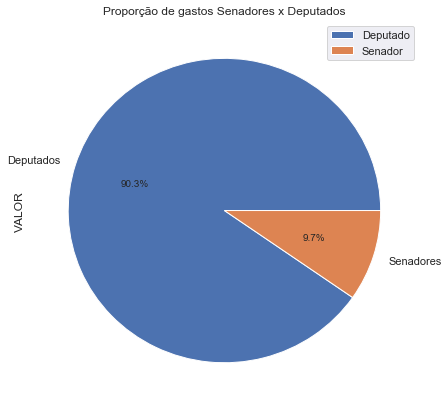

In [11]:
#Gráfico 3
#Subprocesso 3-1-3

ax16 = gasto_mega_cargo.plot(kind='pie', labels=['Deputados','Senadores'], y='VALOR',autopct='%1.1f%%',figsize=(7,7))
ax16.legend(["Deputado","Senador"])
ax16.set_title('Proporção de gastos Senadores x Deputados')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  # This is added back by InteractiveShellApp.init_path()


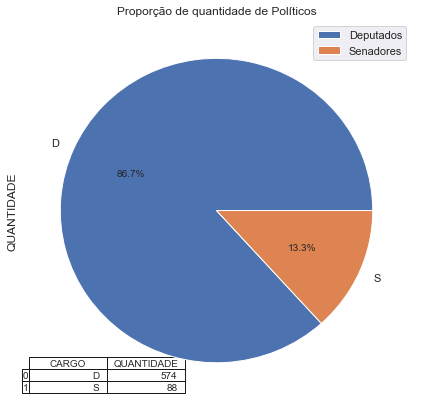

In [13]:
#Gráfico 4
#Sub 3-1-4
#Dividir cargo por qtd
cargo_qtd = massa.groupby('CARGO')['NOME'].nunique().reset_index()

#Alterar o nome da coluna
cargo_qtd.rename(columns={'NOME':'QUANTIDADE'},inplace=True)
#Plotando
ax17 = cargo_qtd.plot(kind='pie',title='Proporção de quantidade de Políticos', y='QUANTIDADE',labels=['D','S'],autopct='%1.1f%%',figsize=(7,7))
ax17.legend(["Deputados","Senadores"],loc='upper right')
table(ax=ax17,data=cargo_qtd,loc='lower left', colWidths=[0.2, 0.2, 0.2])

Text(0,0.5,'Valor em Reais R$')

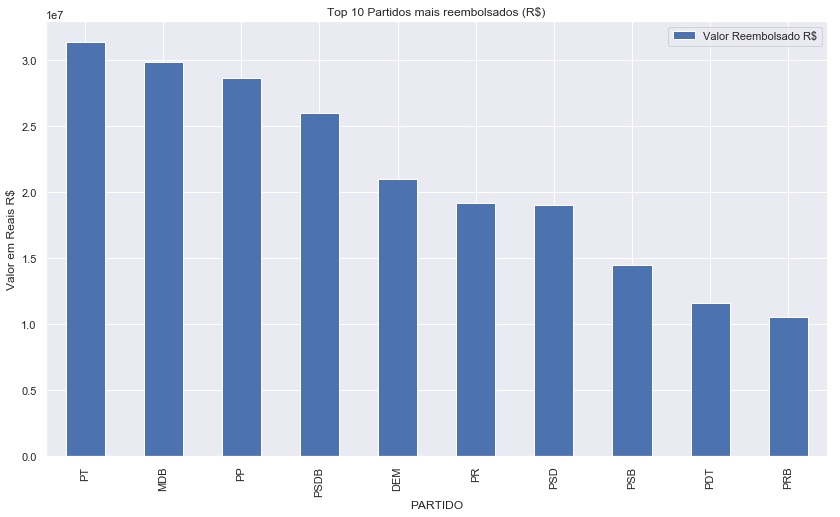

In [14]:
#Gráfico 5
#Sub 3-1-5
#DF go gasto geral por partido
gasto_geral = massa.groupby(['PARTIDO'], as_index=False)['VALOR'].sum()
#organizando os valores
gasto_geral = gasto_geral.sort_values('VALOR',ascending=False)

#plotando os partidos com os 10 maiores gastos
ax11 = gasto_geral.head(10).plot(kind='bar',x='PARTIDO',y='VALOR',color='b',title='Top 10 Partidos mais reembolsados (R$)')
ax11.legend(['Valor Reembolsado R$'])
ax11.set_ylabel('Valor em Reais R$')

Text(0,0.5,'Valor em Reais R$')

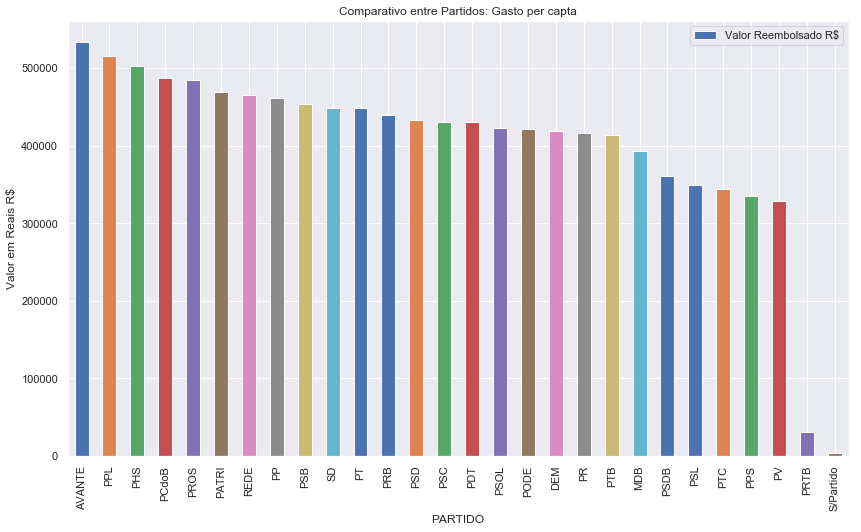

In [15]:
#Gráfico 6
#Sub 3-1-6
# Gráfico média per capta total do partido
#agrupa por pessoa e partido
xpto3 = massa.groupby(['PARTIDO','NOME'],as_index=False)['VALOR'].sum()
#Tira a média
xpto4 = xpto3.groupby(['PARTIDO'],as_index=False)['VALOR'].mean()
#Organizada por valor do maior pro menor
xpto4 = xpto4.sort_values('VALOR', ascending=False)

#Plotando
ax20 = xpto4.plot(kind='bar',x='PARTIDO',y='VALOR', title = 'Comparativo entre Partidos: Gasto per capta')
ax20.legend(['Valor Reembolsado R$'])
ax20.set_ylabel('Valor em Reais R$')

Text(0.5,1,'Comparativo de Gastos mensais entre os 5 partidos mais reembolsados')

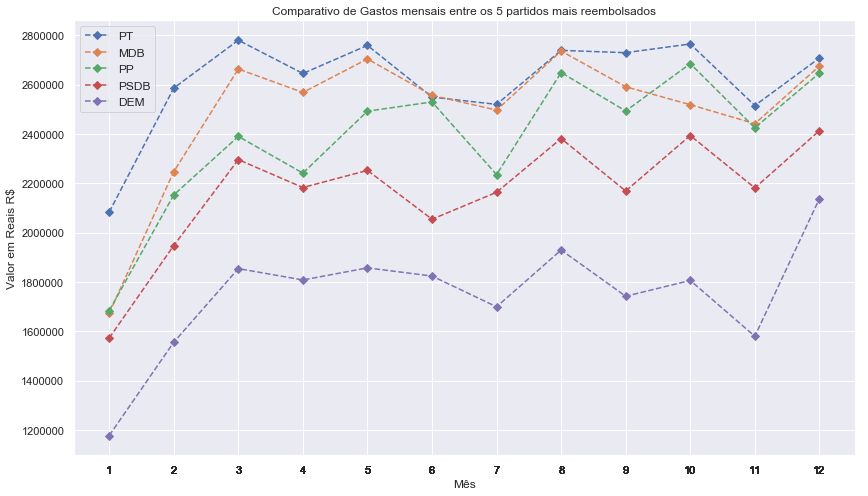

In [18]:
#Gráfico 7
#Sub 3-1-7
#Comparativo dos 5 que mais gastaram durante o ano
#Agrupa para fazer o df de partido por mes
gasto_partido_ano = massa.groupby(['PARTIDO','MES'], as_index=False)['VALOR'].sum() 

#associa cada partido a um df
top_gasto_1 = gasto_partido_ano[(gasto_partido_ano.PARTIDO == 'PT')]
top_gasto_2 = gasto_partido_ano[(gasto_partido_ano.PARTIDO == 'MDB')]
top_gasto_3 = gasto_partido_ano[(gasto_partido_ano.PARTIDO == 'PP')]
top_gasto_4= gasto_partido_ano[(gasto_partido_ano.PARTIDO == 'PSDB')]
top_gasto_5 = gasto_partido_ano[(gasto_partido_ano.PARTIDO == 'DEM')]

#plota
ax12 = top_gasto_1.plot(kind='line',title='Comparativo de Gastos' , x="MES", y="VALOR", marker="D",xticks=gasto_partido_ano['MES'], linestyle="--")
ax12 = top_gasto_2.plot(kind='line',title='Comparativo de Gastos' , x="MES", y="VALOR", marker="D",xticks=gasto_partido_ano['MES'], linestyle="--",ax=ax12)
ax12 = top_gasto_3.plot(kind='line',title='Comparativo de Gastos' , x="MES", y="VALOR", marker="D",xticks=gasto_partido_ano['MES'], linestyle="--",ax=ax12)
ax12 = top_gasto_4.plot(kind='line',title='Comparativo de Gastos' , x="MES", y="VALOR", marker="D",xticks=gasto_partido_ano['MES'], linestyle="--",ax=ax12)
ax12 = top_gasto_5.plot(kind='line',title='Comparativo de Gastos' , x="MES", y="VALOR", marker="D",xticks=gasto_partido_ano['MES'], linestyle="--",ax=ax12)
ax12.set_ylabel("Valor em Reais R$")
ax12.set_xlabel("Mês")
ax12.legend(["PT","MDB",'PP','PSDB','DEM'],fontsize=12)
ax12.grid(True)
ax12.set_title('Comparativo de Gastos mensais entre os 5 partidos mais reembolsados')